In [17]:
import numpy as np, matplotlib.pyplot as plt
from math import pi

Параметры заданные преподавателем:

$$ c = 1,65 $$
$$ k = 0,59 $$
$$ R = 5 $$
$$ u_c = 0 $$
$$ l = 0,5 $$
$$ \alpha = 0,003 $$
$$ T = 40 $$
$$ \psi(\theta) = u_c + cos^4 (\theta) $$

In [45]:
c = 1.65
k = 0.59
R = 5
uc = 0
l = 0.5
alpha = 0.003
T = 40

def psi(theta):
    return uc + np.cos(theta) ** 4

I = 30
K = 100
t = np.linspace(0, T, K + 1)
theta = np.linspace(0.001, pi-0.001, I + 1)

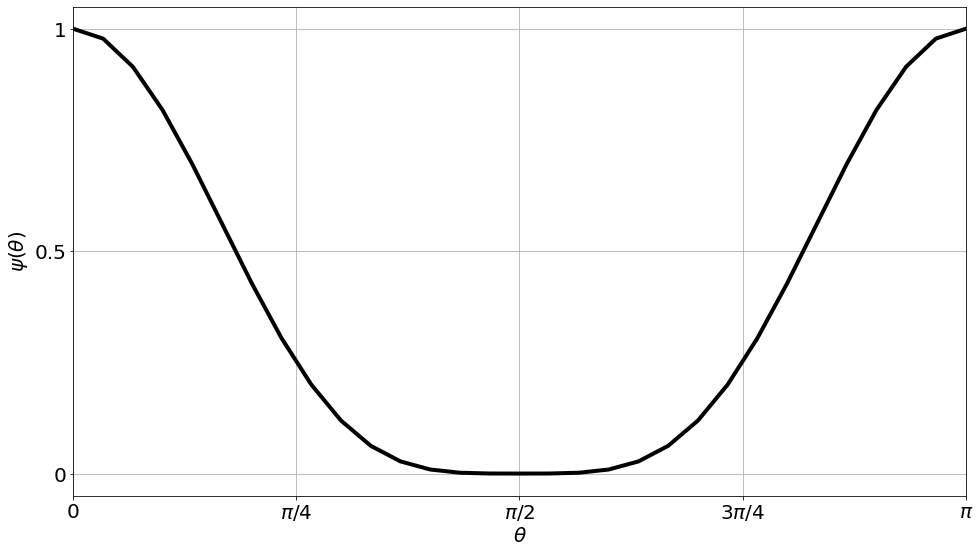

In [46]:
f = plt.figure(figsize=[16, 9])
plt.plot(theta, psi(theta), lw=4, c='black')
plt.xlim([theta[1], theta[-1]])
plt.xlabel('${\\theta}$', fontsize=20)
plt.ylabel('${\\psi(\\theta)}$', fontsize=20)
plt.xticks([0, pi/4, pi/2, 3*pi/4, pi], ['0', '$\\pi / 4$', '$\\pi / 2$', '$3 \\pi / 4$', '$\\pi$'], fontsize=20)
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=20)
plt.grid()
plt.show()

In [47]:
h_t = t[2] - t[1]
h_theta = theta[2] - theta[1]

In [48]:
gamma = k * h_t / (R ** 2 * c * h_theta ** 2)
betta = - alpha * h_t / (l * c)

In [49]:
def omega(i):
        return k * h_t / (2 * R ** 2 * np.tan(theta[i]) * c * h_theta)

In [50]:
v = np.zeros([K + 1, I + 1])
v[0, :] = psi(theta)

In [55]:
for k_ind in range(1, K + 1):
            for i_ind in range(0, I + 1):
                if i_ind == 0:
                    v[k_ind, i_ind] = (1 + betta - 4*gamma) * v[k_ind - 1, i_ind] + 2*gamma * v[k_ind - 1, i_ind + 1]
                elif i_ind == I:
                    v[k_ind, i_ind] = (1 + betta - 4*gamma) * v[k_ind - 1, i_ind] + 2*gamma * v[k_ind - 1, i_ind - 1]
                else:
                    v[k_ind, i_ind] = (1 + 2 * gamma + betta) * v[k_ind - 1, i_ind] + (omega(i_ind) + gamma) * v[k_ind - 1, i_ind + 1] + (gamma - omega(i_ind)) * v[k_ind - 1, i_ind - 1]

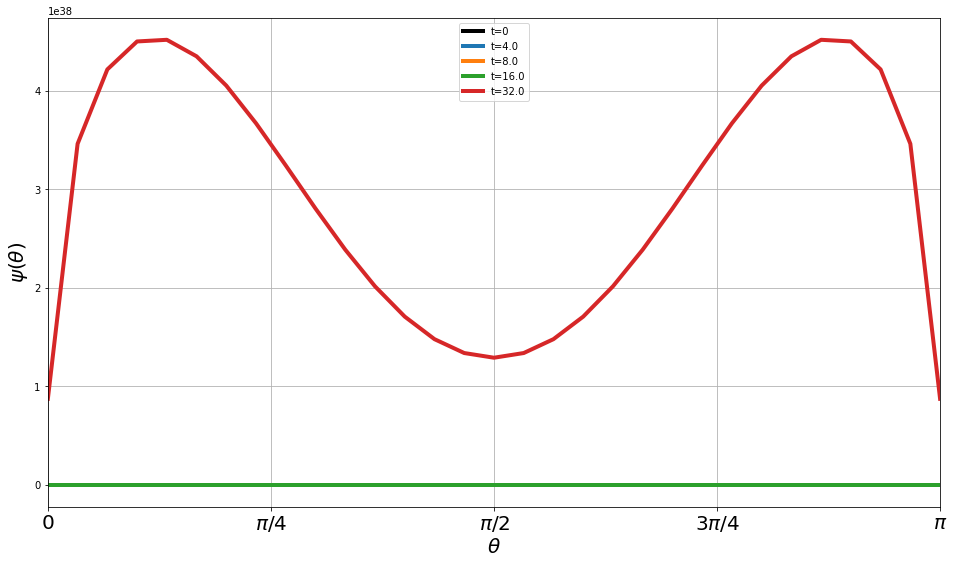

In [56]:
f = plt.figure(figsize=[16, 9])
plt.plot(theta, v[0, :], lw=4, c='black', label='t=0')
for ind in [10, 20, 40, 80]:
    plt.plot(theta, v[ind, :], lw=4, label='t='+str(t[ind]))

plt.xlim([theta[1], theta[-1]])
plt.xlabel('${\\theta}$', fontsize=20)
plt.ylabel('${\\psi(\\theta)}$', fontsize=20)
plt.xticks([0, pi/4, pi/2, 3*pi/4, pi], ['0', '$\\pi / 4$', '$\\pi / 2$', '$3 \\pi / 4$', '$\\pi$'], fontsize=20)
# plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=20)
plt.legend()
plt.grid()
plt.show()